In [1]:
from simulator import HathorSimulator, Miner, TxGenerator, TipsMetric
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import random

In [2]:
def run(tx_lambda):
    sim = HathorSimulator(block_weight=23.66463018297268)
    sim.ignore_update_acc_weight = True

    m0 = Miner(hashpower=100000)
    sim.add_miner(m0)

    g1 = TxGenerator(tx_lambda=tx_lambda, hashpower=100000)
    sim.add_tx_generator(g1)

    sim.run(3600, report_interval=3600)

    tips_metric = TipsMetric(interval=5)
    sim.add_metric(tips_metric)

    sim.run(3600*24, report_interval=None)

    return sim

In [3]:
data = []
for tx_lambda in (0.25, 0.5, 1, 2, 4, 8, 16, 32):
    print('@@', tx_lambda)
    sim = run(tx_lambda)
    tips_metric = sim.metrics[0]
    data.append((tx_lambda, tips_metric.values))

('@@', 0.25)
('@@', 0.5)
('@@', 1)
('@@', 2)
('@@', 4)
('@@', 8)
('@@', 16)
('@@', 32)


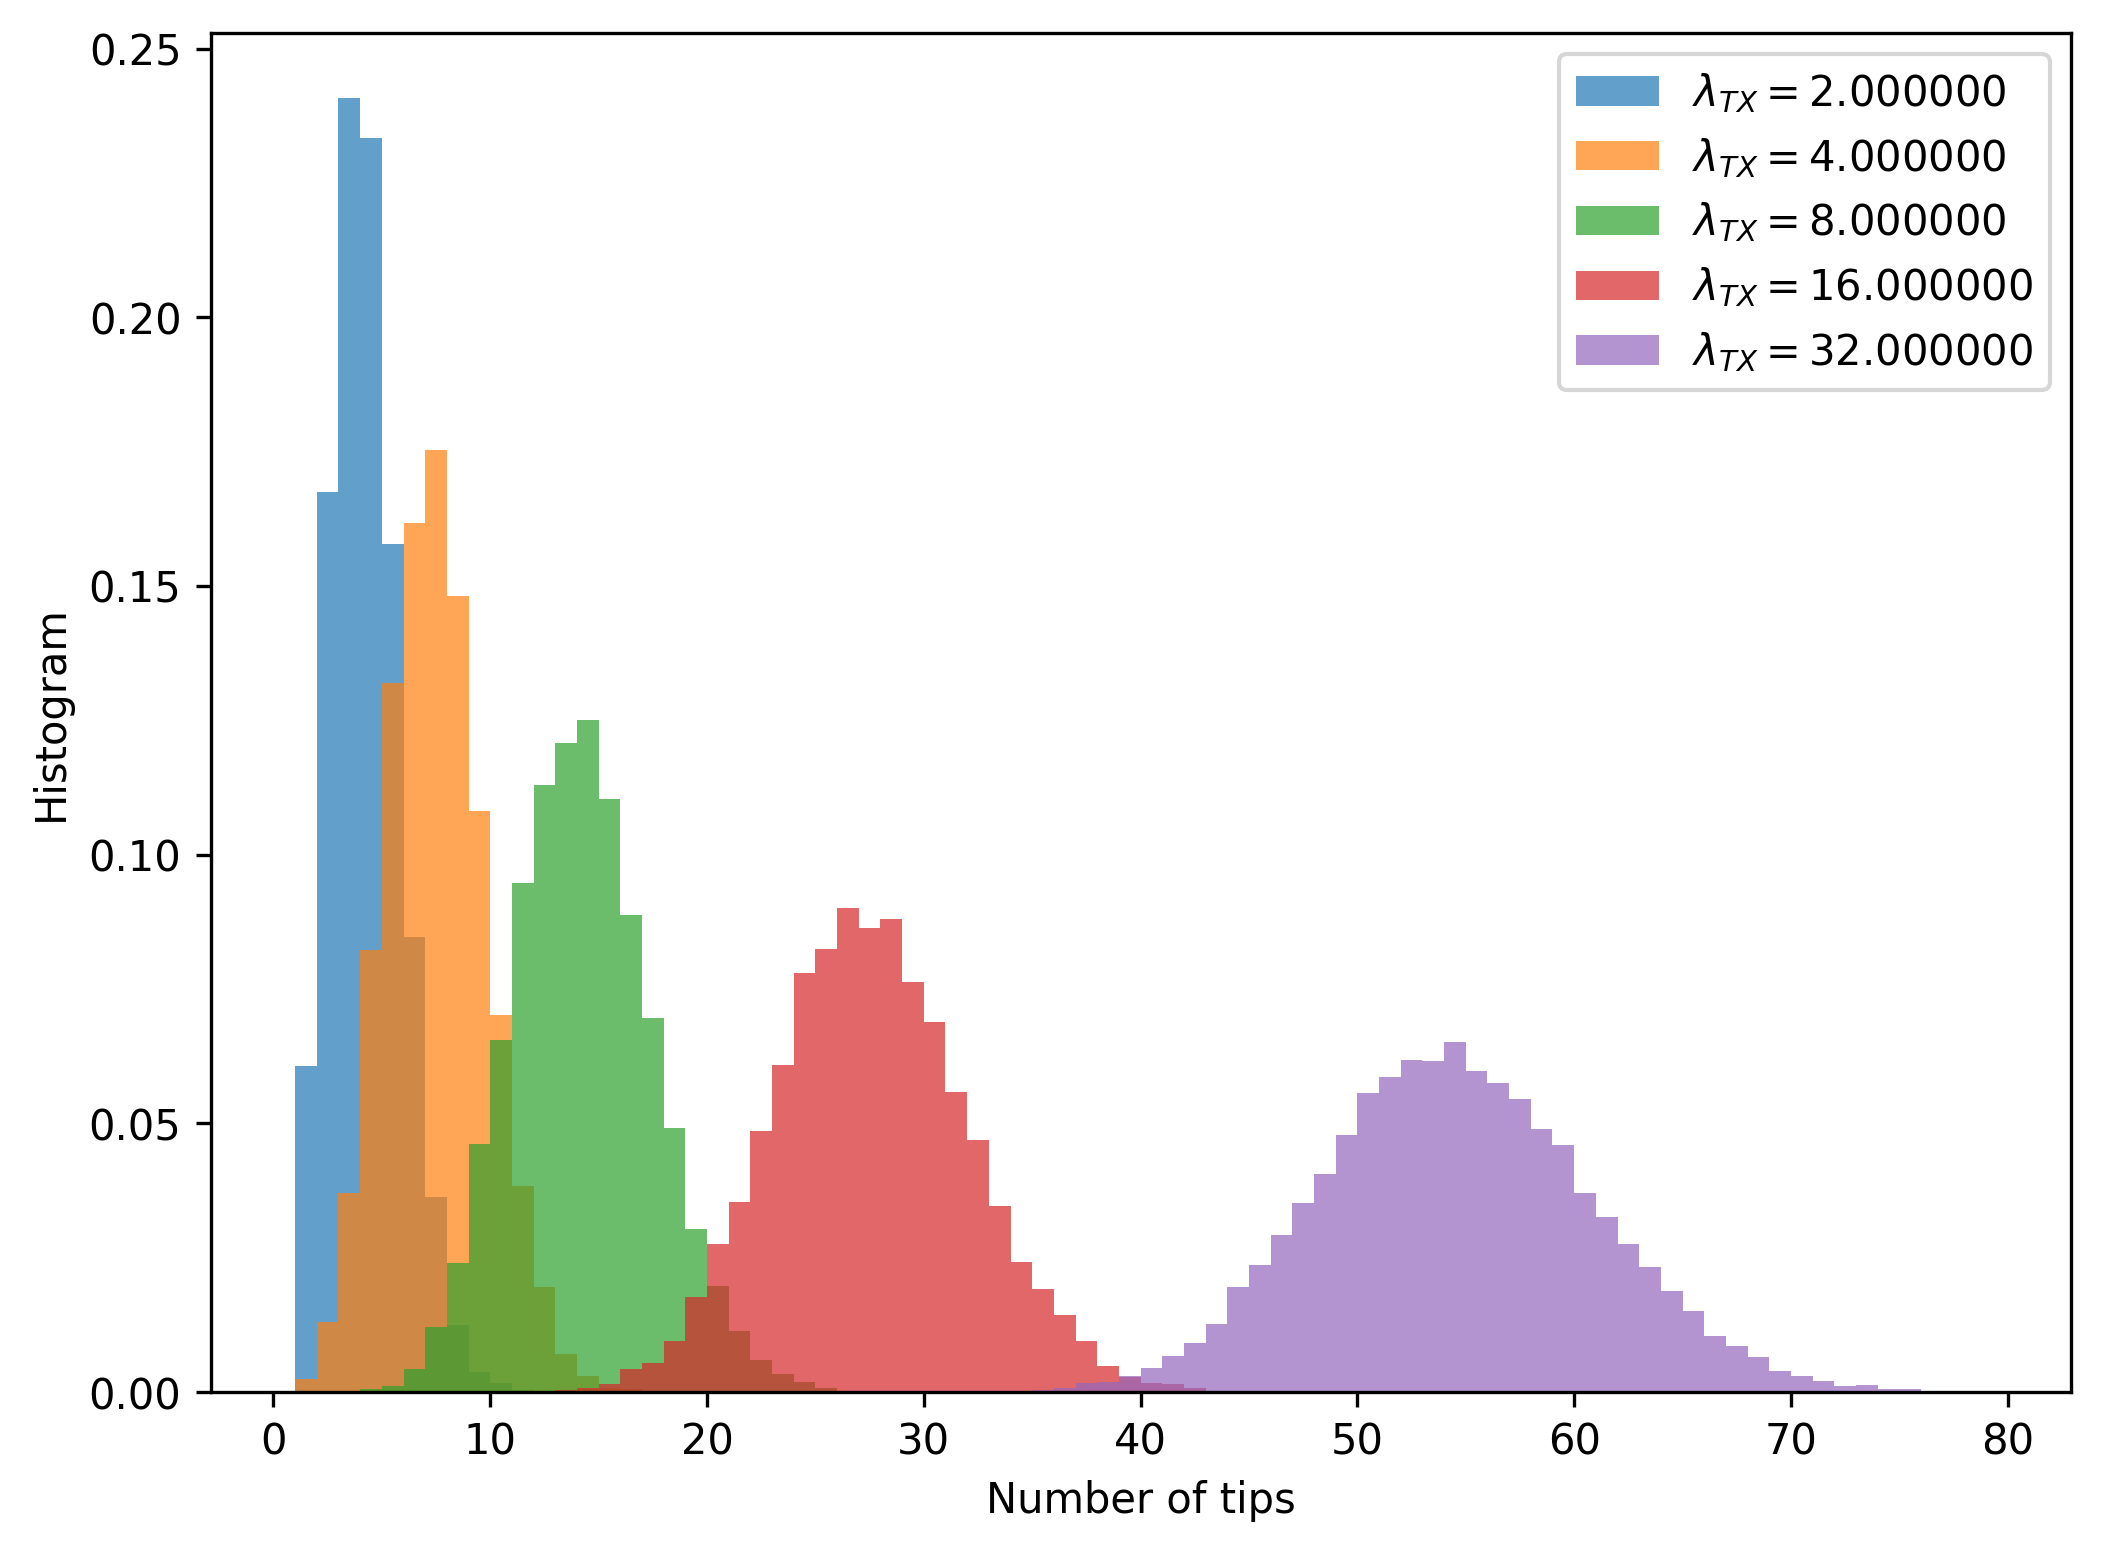

In [6]:
plt.figure(figsize=(8, 6), dpi=300)

for tx_lambda, v in data[3:]:
    bins = 'fd'
    bins = range(min(v), max(v)+1)

    plt.hist(v, bins=bins, density=True, alpha=0.7, label='$\lambda_{{TX}} = {:.6f}$'.format(tx_lambda));

plt.ylabel('Histogram')
plt.xlabel('Number of tips');
plt.legend();